In [9]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_general, tensor_basis
from quspin.tools.measurements import obs_vs_time
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import norm

In [10]:
import spinFuncts as sf

In [11]:
#constant parameters
N  = 1        #system size
V  = 0.5      #coupling strength
L  = [1, 1]   #lambda prefix

S1 = '5/2'    #spin of 1
S2 = '1/2'    #spin of 2

#just initializing
h1 = [0,0,0]  #hx_1 = h1[0], etc
h2 = [0,0,0]
J1 = [0,0,0]  #Jx_1 = J1[0], etc
J2 = [0,0,0]

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


C:\Users\Rey\Desktop\code\spinFuncts.py:54: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:54: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:55: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
  H2 = hamiltonian(static2, [], dtype=np.complex128, basis=basis) #to make operators for 2
C:\Users\Rey\Desktop\code\spinFuncts.py:55: UserWarning: Test for particle conservation not implemented for <c

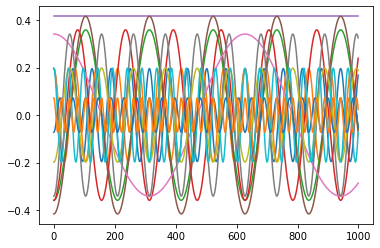

In [12]:
h1 = [4,3,1]
h2 = [2,0,0]

J1, J2, zz = sf.getJs(N, S1, S2, h1, h2)

H1 = sf.H_ini(h1, h2, J1, J2)
vals, vects = H1.eigh()

h1 = [0,0,1]
h2 = [0,0,1]
J1, J2, Jzz = sf.getJs(N, S1, S2, h1, h2)

H2 = sf.H_dyn(h1, h2, L, V, J1, J2, Jzz)
times = np.linspace(0.0, 20.0, 1000)

v_t = H2.evolve(vects[0], t0=0, times=times)

plt.plot(v_t.T)

dict_keys(['Jx_1', 'Jy_1', 'Jz_1', 'Jx_2', 'Jy_2', 'Jz_2', 'psi_t'])


C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'time')

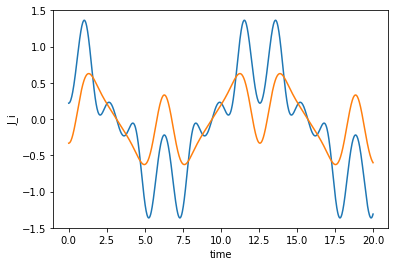

In [13]:
Obs_time = obs_vs_time(v_t, times, {'Jx_1':J1[0],
                                    'Jy_1':J1[1],
                                    'Jz_1':J1[2], 
                                    'Jx_2':J2[0],
                                    'Jy_2':J2[1],
                                    'Jz_2':J2[2]}, return_state=True)
print(Obs_time.keys())

Jx_1_time=Obs_time['Jx_1']
Jy_1_time=Obs_time['Jy_1']
Jz_1_time=Obs_time['Jz_1']

Jx_2_time=Obs_time['Jx_2']
Jy_2_time=Obs_time['Jy_2']
Jz_2_time=Obs_time['Jz_2']

#psi_time=Obs_time['psi_t']

plt.plot(times, Jx_1_time)
plt.plot(times, Jx_2_time)
plt.ylabel('J_i')
plt.xlabel('time')